In [86]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [87]:
def init_the_map(size=100, num_of_agent_types=2, free_cells_percent=50):
    each_agent_cells_percent = ((100 - free_cells_percent) / num_of_agent_types) / 100

    map = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            random_num = np.random.random()
            for a in range(num_of_agent_types):
                if random_num < (a + 1) * each_agent_cells_percent:
                    map[i][j] = a + 1
                    break

    return map


def does_want_to_move(value, cells_to_check, limit):
    unique, counts = np.unique(cells_to_check, return_counts=True)
    all_counts = dict(zip(unique, counts))

    if value not in all_counts:
        return limit > 0

    return all_counts[value] < limit


def find_who_wants_to_move(map, wished_same_neighbours):
    moving_map = np.zeros(map.shape).astype(bool)
    for i in range(moving_map.shape[0]):
        for j in range(moving_map.shape[1]):
            if map[i][j] == 0:
                continue

            cells_to_check = []

            ver_idxs = np.arange(max(i-1, 0), min(i+1, moving_map.shape[0]-1)+1)
            gor_idxs = np.arange(max(j-1, 0), min(j+1, moving_map.shape[1]-1)+1)

            for y in ver_idxs:
                for x in gor_idxs:
                    if not (y == i and x == j):
                        cells_to_check.append(map[y][x])

            moving_map[i][j] = does_want_to_move(map[i][j], cells_to_check, wished_same_neighbours)

    return moving_map


def move(map, moving_map):
    new_map = np.zeros(map.shape)

    free_spaces = np.zeros(map.shape).astype(bool)
    free_spaces[map == 0] = True
    free_spaces[moving_map == True] = True

    for i in range(moving_map.shape[0]):
        for j in range(moving_map.shape[1]):
            if moving_map[i][j]:

                while True:
                    new_i = np.random.randint(0, moving_map.shape[0])
                    new_j = np.random.randint(0, moving_map.shape[1])
                    if free_spaces[new_i][new_j]:
                        free_spaces[new_i][new_j] = False
                        new_map[new_i][new_j] = map[i][j]
                        break
                
            elif free_spaces[i][j] or map[i][j] != 0:
                new_map[i][j] = map[i][j]

    return new_map

In [88]:
def plot_the_map(map, title='Game map'):
    map_has_free_cells = np.min(map) == 0
    map = np.max(map) - map

    plt.figure(figsize=(14, 11))
    im = plt.imshow(map, cmap='gist_heat')

    unique_vals = np.unique(map)
    
    colors = [im.cmap(im.norm(value)) for value in unique_vals]
    patches = []
    k = 0

    for i, val in enumerate(unique_vals):
        if map_has_free_cells and val == np.max(map):
            label = 'free'
        else:
            label = 'Agent num ' + str(k)
            k += 1

        patches.append(mpatches.Patch(color=colors[i], label=label))

    legend = plt.legend(handles=patches, bbox_to_anchor=(1, 1.0), loc='upper left')
    frame = legend.get_frame()
    frame.set_facecolor((0.75, 0.75, 0.75))

    plt.title(title, fontsize=20)
    plt.tick_params(labelsize=20)

In [89]:
import os
import imageio


def save_gif_and_get_curve(R, num_steps, num_seconds):
    frames = []
    limit = R * 8
    map = init_the_map(free_cells_percent=0)

    the_curve = []
    
    for step in range(num_steps):
        print('\r{}/{}'.format(step+1, num_steps), end='')

        moving_map = find_who_wants_to_move(map, limit)

        condition = moving_map == True
        want_to_move = np.count_nonzero(condition)
        the_curve.append(want_to_move)

        map = move(map, moving_map)

        plot_the_map(map, title='R = {}, step={}/{}'.format(R, step+1, num_steps))
        
        plt.savefig('iframe.png')
        plt.close()

        frames.append(imageio.imread('iframe.png'))
     
    imageio.mimsave('Shellings/Progress_when_8R_is_{}.gif'.format(int(limit)), frames, fps=num_steps/num_seconds)
    os.remove('iframe.png')  

    return the_curve

In [90]:
def plot_curves(curves, R):
    plt.figure(figsize=(14, 11))

    for i, curve in enumerate(curves):
        plt.plot(curve, label='R = {}'.format(R[i]))

    plt.legend(fontsize=20)
    plt.title('Number of householders that want to move', fontsize=20)
    plt.xlabel('Step', fontsize=20)
    plt.ylabel('Num of wanters to move', fontsize=20)
    plt.tick_params(labelsize=20)

In [91]:
num_steps = 50
R_mass = [0, 1/8, 2/8, 3/8, 4/8, 5/8, 6/8, 7/8, 1]

curves_from_R = []

for i, R in enumerate(R_mass):
    print('\nR = {}'.format(R))
    curve = save_gif_and_get_curve(R, num_steps=50, num_seconds=5)

    curves_from_R.append(curve)


R = 0
50/50
R = 0.125
50/50
R = 0.25
50/50
R = 0.375
50/50
R = 0.5
50/50
R = 0.625
50/50
R = 0.75
50/50
R = 0.875
50/50
R = 1
50/50

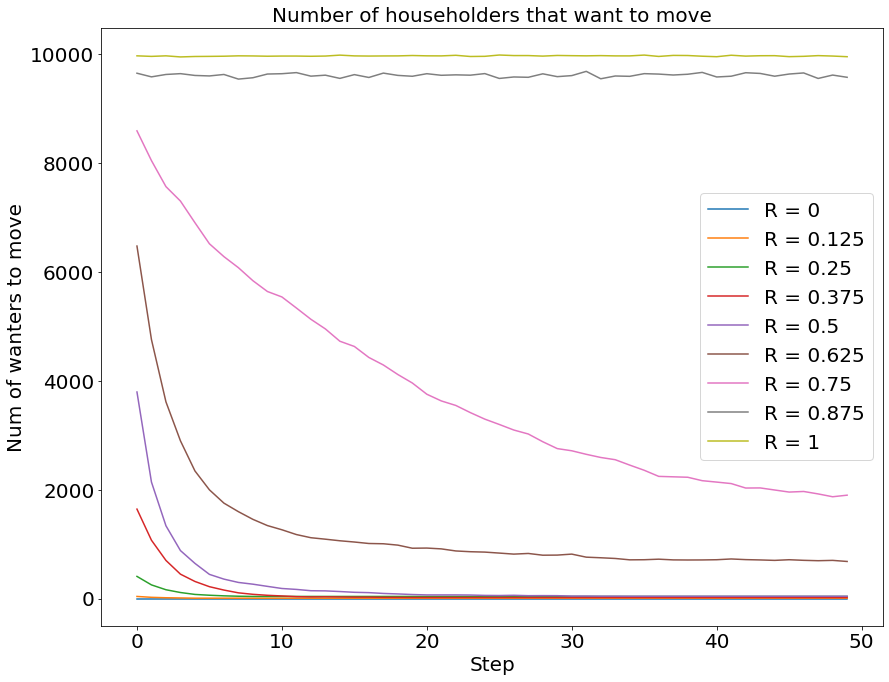

In [92]:
plot_curves(curves_from_R, R_mass)
plt.savefig('Shellings/Plot.png')